# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [10]:
# 1
## Checking whether the distribution of the df is normal:
import scipy.stats as stats

print(df.head())

stats.shapiro(df.temperature)



   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


(0.9865770936012268, 0.233174666762352)

Okay, so we see here that the results of the Shapiro test for normality. The second value there is the p, which is 0.23. This is higher than the usual cutoff, 0.05, and so we fail to reject the null hypothesis that the distribution is normal. I'll double check these results using a histogram

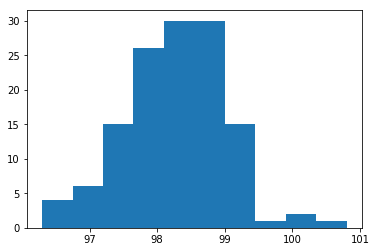

In [13]:
# Making a histogram
import matplotlib.pyplot as plt

plt.hist(df.temperature)
             
plt.show()

This looks somewhat normal, although there do appear to be some outliers over 100. But this combines with the results of the Shapiro-Wilk test are enough to imply that the body temperature of this dataset is normally distributed.

In [19]:
# 2
len(df) #this will give us the number of samples, and thus the sample size


130

130 observations is much larger than the 30 needed in order for a sample to be considered large

In [24]:
# this performs a chi squared test of independence, which will calculate the liklihood of independence

crosstab1 = pd.crosstab(df['temperature'], df['heart_rate'])

stats.chi2_contingency(crosstab1)


(909.4347952312239,
 0.967631309911425,
 990,
 array([[0.01538462, 0.00769231, 0.00769231, ..., 0.01538462, 0.00769231,
         0.01538462],
        [0.01538462, 0.00769231, 0.00769231, ..., 0.01538462, 0.00769231,
         0.01538462],
        [0.03076923, 0.01538462, 0.01538462, ..., 0.03076923, 0.01538462,
         0.03076923],
        ...,
        [0.01538462, 0.00769231, 0.00769231, ..., 0.01538462, 0.00769231,
         0.01538462],
        [0.01538462, 0.00769231, 0.00769231, ..., 0.01538462, 0.00769231,
         0.01538462],
        [0.01538462, 0.00769231, 0.00769231, ..., 0.01538462, 0.00769231,
         0.01538462]]))

In [25]:
# Now we check whether temp and gender are independent
crosstab2 = pd.crosstab(df['temperature'], df['gender'])
stats.chi2_contingency(crosstab2)

(25.144877344877344, 0.83459920689748, 33, array([[0.5, 0.5],
        [0.5, 0.5],
        [1. , 1. ],
        [0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5],
        [1.5, 1.5],
        [1.5, 1.5],
        [0.5, 0.5],
        [2.5, 2.5],
        [1. , 1. ],
        [2. , 2. ],
        [1.5, 1.5],
        [3.5, 3.5],
        [2.5, 2.5],
        [5.5, 5.5],
        [1.5, 1.5],
        [5. , 5. ],
        [2.5, 2.5],
        [4.5, 4.5],
        [1.5, 1.5],
        [5. , 5. ],
        [4. , 4. ],
        [5. , 5. ],
        [1. , 1. ],
        [2.5, 2.5],
        [1.5, 1.5],
        [1.5, 1.5],
        [1. , 1. ],
        [1. , 1. ],
        [0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5]]))

In [26]:
# Lastly, we check whether heart rate and gender are independent
crosstab3 = pd.crosstab(df['heart_rate'], df['gender'])
stats.chi2_contingency(crosstab3)

(34.695238095238096, 0.2538983650429774, 30, array([[1. , 1. ],
        [0.5, 0.5],
        [0.5, 0.5],
        [1. , 1. ],
        [1. , 1. ],
        [0.5, 0.5],
        [3. , 3. ],
        [1.5, 1.5],
        [2. , 2. ],
        [1. , 1. ],
        [3. , 3. ],
        [3. , 3. ],
        [3.5, 3.5],
        [3. , 3. ],
        [2.5, 2.5],
        [5. , 5. ],
        [3. , 3. ],
        [2.5, 2.5],
        [1.5, 1.5],
        [3.5, 3.5],
        [5. , 5. ],
        [3.5, 3.5],
        [2. , 2. ],
        [2.5, 2.5],
        [2.5, 2.5],
        [2. , 2. ],
        [2. , 2. ],
        [0.5, 0.5],
        [1. , 1. ],
        [0.5, 0.5],
        [1. , 1. ]]))

The p-values are the second stat of the first line of output. They are: 0.967631309911425, 0.83459920689748, and 0.2538983650429774. These figures are all above the traditional cutoff of 0.05, and this we fail to reject the null hypothesis. This implies that there is likely no relationship between any of the three variables, and thus we can say that they are likley independent. 

In [39]:
# 3

# Okay, so we're doing a bootstrap hypothesis test to determine whether the true population mean temperature is 98.6
# we need to first define the draw bs reps function and the bootstrap_replicate_1d, so we can use them to draw boostrap samples:

def bootstrap_replicate_1d(data, func):
     """Generate bootstrap replicate of 1D data."""
     bs_sample = np.random.choice(data, len(data))
     return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# so we're going to make a translated array from which to draw replicates from, and then test those means against the
# mean of the observed data. Then we will determine (using p) whether the difference between the two is statistically significant

# Make an array of translated impact forces: translated_force_b
translated_temp = df.temperature - np.mean(df.temperature) + 98.6 # we translate because we're testing whether the mean = 0.55

bs_replicates = draw_bs_reps(translated_temp, np.mean, 10000)

p = np.sum(bs_replicates <= np.mean(df.temperature)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0


We see here that the p value is very small (0). This indicates that we can reject the null hypothesis that the true population mean temperature is 98.6. This indicates that the true population mean temperature is likley less than 98.6

I would use a one-sample test, as we're only testing the true mean of one variable, not the difference or relationship between two variables. I would also use the z statistic as this sample has a large sample size (130), and the sample size is over the cutoff (30) under which we would use a t test.

In [41]:
## Now we'll conduct the z test!

import statsmodels.stats.weightstats as ssw

ssw.ztest(df.temperature, value=98.6, alternative='two-sided')


(-5.4548232923645195, 4.9021570141012155e-08)

In [52]:
# 4
# First we draw the small random sample of 10:

np.random.seed(7654567)

sample = np.random.choice(df.temperature, 10)

print(sample)


[98.1 98.7 98.6 98.8 98.6 98.4 96.3 98.6 98.3 99. ]


In [53]:
# now we run a z test and a t test on this small sample and compare them:
# first, the z test
ssw.ztest(sample, value=98.6, alternative='two-sided')


(-1.0812495973528047, 0.2795861011938462)

We can see that the p is much higher. That could make the data misleading, as our more sound test had a very low p value. Let's compare this to the t test

In [54]:
# The t test: (the default alternative is two sided)

stats.ttest_1samp(sample, 98.6)

Ttest_1sampResult(statistic=-1.081249597352805, pvalue=0.30770570322201435)

Here we have a very similar p value. 

In [55]:
# 5 
#This problem involves creating a confidence interval. Any temperature that falls outside of that interval
# would be considered abnormal. 

# The first confidence interval I'm going to create will be done using boostrapping. We first define a function that
# will draw boostrap replicates and calculate the function specified for each sample

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

bs_replicates = draw_bs_reps(df.temperature, np.mean, 10000)

conf_int = np.percentile(bs_replicates, [2.5, 97.5])

print('95% confidence interval =', conf_int)

95% confidence interval = [98.12230769 98.37538462]


So bootstrapping gave us a CI of (98.12, 98.37), so any temperature outside of that interval would be considered abnormal

In [67]:
# Now we calculate the margin of error:

(98.37538462 - 98.12230769)/2

0.126538465000003

MOE = 0.13, very small. Let's try the frequentist approach next.

In [57]:
# CI the frequintist way!

mu, sigma = np.mean(df.temperature), np.std(df.temperature)


# NOTE, we're using the formula for a single draw, so we don't divide sigma by the sqrt of N
stats.norm.interval(0.68, loc=mu, scale=sigma)



(97.5229207184351, 98.97554082002645)

In [68]:
# Margin of error:

(98.97554082002645 - 97.5229207184351)/2

0.726310050795675

This results in a much wider confidence interval, (97.52, 98.98). The margin of error is also much larger

In [63]:
# 6
# First, let's seperate the boys and the girls

boys = df.temperature[df.gender == 'M']

girls = df.temperature[df.gender == 'F']



In [66]:
# Now, we'll define a function that calculates the difference of means:

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# another function is needed: one that generates a permutation sample from two datasets. This creates another array 
# of the same size and then splits it acording to the lengths of the two original datasets

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# we'll also define a function that generates many permutation replicates, so we can gather many sample statistics

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

# Now we'll use boostrapping to determine whether the means for these two groups are equal, 
# AKA whether the true mean of the difference between the means is 0

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(boys, girls)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(boys, girls,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.9872


Here, the high p value (0.9872) means that we fail to reject the null hypothesis, which is that there is no difference between the mean body temperatures of men and woman. Therefore, nothing in our data suggests that there is a statistically significant difference between the mean body temperatures of men and women. 
